In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
#Importing testing data
fullData = pd.read_csv("GPT-wiki-intro.csv")
gptDataSeries = fullData["generated_intro"]
humanDataSeries = fullData["wiki_intro"]

In [3]:
gpt_df = gptDataSeries.to_frame()
humanData_df = humanDataSeries.to_frame()
# gpt_df.insert(1, 'avg_sentence_len', 0)
# humanData_df.insert(1, 'avg_sentence_len', 0)
gpt_df = gpt_df.rename(columns= {'generated_intro': 'text'})
humanData_df = humanData_df.rename(columns= {'wiki_intro': 'text'})

In [4]:
gpt_df.head()

,text
0,Sexhow railway station was a railway station l...
1,"In Finnish folklore, all places and things, an..."
2,"In mathematics, specifically differential calc..."
3,is a Japanese shōjo manga series written and i...
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ..."


In [5]:
def average_sentence_length(text):
    lengths = 0
    count = 0
    sentences = text.split('.')
    for sentence in sentences:
        lengths += len(sentence)
        count += 1
    return lengths / count

In [6]:
gpt_df['avg_sentence_length'] = gpt_df.apply(lambda row: average_sentence_length(row['text']),axis=1)
humanData_df['avg_sentence_length'] = humanData_df.apply(lambda row: average_sentence_length(row['text']),axis=1)

In [7]:
gpt_df.head()

,text,avg_sentence_length
0,Sexhow railway station was a railway station l...,73.833333
1,"In Finnish folklore, all places and things, an...",79.333333
2,"In mathematics, specifically differential calc...",81.800000
3,is a Japanese shōjo manga series written and i...,60.909091
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",69.545455


In [8]:
humanData_df.head()

,text,avg_sentence_length
0,Sexhow railway station was a railway station b...,97.600000
1,"In Finnish folklore, all places and things, an...",85.538462
2,"In mathematics, specifically differential calc...",220.000000
3,is a Japanese shōjo manga series written and i...,121.933333
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",79.692308


In [9]:
gpt_df

,text,avg_sentence_length
0,Sexhow railway station was a railway station l...,73.833333
1,"In Finnish folklore, all places and things, an...",79.333333
2,"In mathematics, specifically differential calc...",81.800000
3,is a Japanese shōjo manga series written and i...,60.909091
4,"Robert Milner ""Rob"" Bradley, Jr. (born August ...",69.545455
...,...,...
149995,Randy Borum is a Professor and Coordinator of ...,76.333333
149996,"Sa'och (, also, ""Sauch"") is an endangered, nuc...",92.666667
149997,Philip C. Hanawalt (born 1931) is an American ...,87.000000
149998,Vossius Gymnasium is a public gymnasium in the...,74.111111


In [11]:
gpt_df['avg_sentence_length'].describe()

count    150000.000000
mean         87.283082
std          25.026595
min           9.210526
25%          73.285714
50%          85.750000
75%          98.910985
max        1176.000000
Name: avg_sentence_length, dtype: float64

In [12]:
humanData_df['avg_sentence_length'].describe()

count    150000.000000
mean        121.809221
std          88.147250
min          10.257143
25%          93.833333
50%         110.888889
75%         131.285714
max        3127.000000
Name: avg_sentence_length, dtype: float64

# Look at those standard deviations, there's a very significant difference between the two! The AI is far more consistent in sentence length than a human!

In [13]:
gpt_df['avg_sentence_length'].var()

626.3304704743197

In [15]:
humanData_df['avg_sentence_length'].var()

7769.9377154305785

# There's also a massive difference in variability. We should remove outliers to confirm our results.

In [24]:
gpt_avgs = gpt_df['avg_sentence_length']
human_avgs = humanData_df['avg_sentence_length']

In [25]:
# x = x[x.between(x.quantile(.15), x.quantile(.85))] # without outliers
gpt_avgs = gpt_avgs[gpt_avgs.between(gpt_avgs.quantile(.15), gpt_avgs.quantile(.85))]
human_avgs = human_avgs[human_avgs.between(human_avgs.quantile(.15), human_avgs.quantile(.85))]

In [26]:
gpt_avgs.head()

0    73.833333
1    79.333333
2    81.800000
4    69.545455
5    92.333333
Name: avg_sentence_length, dtype: float64

In [27]:
gpt_avgs.describe()

count    105038.000000
mean         86.019669
std          10.648825
min          66.666667
25%          77.333333
50%          85.750000
75%          94.500000
max         106.833333
Name: avg_sentence_length, dtype: float64

In [28]:
human_avgs.describe()

count    105025.000000
mean        112.051693
std          15.600288
min          85.312500
25%          99.250000
50%         110.888889
75%         124.071429
max         144.750000
Name: avg_sentence_length, dtype: float64

In [29]:
gpt_avgs.var()

113.39746532305534

In [30]:
human_avgs.var()

243.36899097535198

# Still a very significant difference as seen in variablity and standard deviation

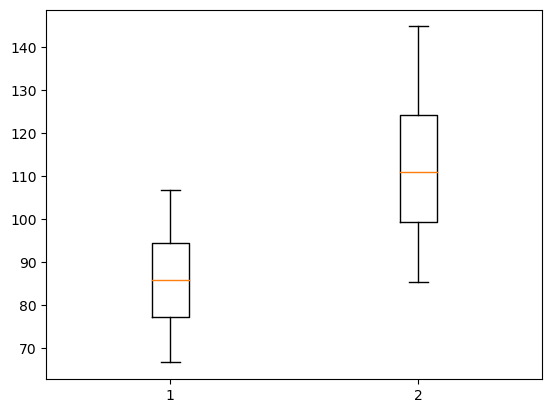

In [31]:
box_data = [gpt_avgs, human_avgs]
plt.boxplot(box_data)
plt.show()

# Can it may be possible to detect with some certaintity if the average length falls within the quartiles. Lets look at the data with the variablities